# Customer Segmentation
Here at The Amazing Model Toy Company we want to know who our customers are (aka customer segmentation). Here are just a few of the potential benefits of customer segmentation analysis:
- Better customer relationships
- More customer retention
- Allocate advertising money effectively
- Improve product design and distribution 

To put in simply, customer segmentation analysis will allow our recources to be allocated more effeciently in a manner to address the needs of our customers. In this project we will dive deep into our customer database and discover exactly what makes our groups of customers unique. Customer data from a period of 29 months between 2003 and 2005 was analyzed using many clustering and dimensionality reduction techniques. [The dataset can be found here](https://www.kaggle.com/kyanyoga/sample-sales-data).

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    r"/Users/tarrantcarter/Dropbox/Data Science/Thinkful/Thinkful Data Science Projects/Unsupervised_Learning_Capstone/sales_data_sample.csv",
    encoding="unicode_escape",
)

<IPython.core.display.Javascript object>

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

<IPython.core.display.Javascript object>

In [5]:
# drop columns that aren't useful
df2 = df.drop(
    [
        "ORDERNUMBER",
        "STATUS",
        "PHONE",
        "ADDRESSLINE1",
        "ADDRESSLINE2",
        "CITY",
        "POSTALCODE",
        "CONTACTLASTNAME",
        "CONTACTFIRSTNAME",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [6]:
# functiom that displays the percentage of missing values from each column
def missingness_summary(df, print_log=True, sort="descending"):
    percentage_null = df.isnull().sum() * 100 / df.isnull().count()
    pd.set_option("display.max_rows", None)
    if sort.lower() == "ascending":
        percentage_null = percentage_null.sort_values(ascending=True)
    elif sort.lower() == "descending":
        percentage_null = percentage_null.sort_values(ascending=False)
    if print_log:
        print(percentage_null)

    return pd.Series(percentage_null)


missing = missingness_summary(df2)

STATE              52.639036
TERRITORY          38.044633
DEALSIZE            0.000000
COUNTRY             0.000000
CUSTOMERNAME        0.000000
PRODUCTCODE         0.000000
MSRP                0.000000
PRODUCTLINE         0.000000
YEAR_ID             0.000000
MONTH_ID            0.000000
QTR_ID              0.000000
ORDERDATE           0.000000
SALES               0.000000
ORDERLINENUMBER     0.000000
PRICEEACH           0.000000
QUANTITYORDERED     0.000000
dtype: float64


<IPython.core.display.Javascript object>

In [7]:
# drop state and territoy column
df3 = df2.drop(["STATE", "TERRITORY"], axis=1)
missing = missingness_summary(df3)

DEALSIZE           0.0
COUNTRY            0.0
CUSTOMERNAME       0.0
PRODUCTCODE        0.0
MSRP               0.0
PRODUCTLINE        0.0
YEAR_ID            0.0
MONTH_ID           0.0
QTR_ID             0.0
ORDERDATE          0.0
SALES              0.0
ORDERLINENUMBER    0.0
PRICEEACH          0.0
QUANTITYORDERED    0.0
dtype: float64


<IPython.core.display.Javascript object>

In [8]:
print("Number of Object Columns:", df3.select_dtypes(object).shape[1])
print("Number of Numeric Columns:", df3.select_dtypes(["integer", "float"]).shape[1])

Number of Object Columns: 6
Number of Numeric Columns: 8


<IPython.core.display.Javascript object>

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CUSTOMERNAME     2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


<IPython.core.display.Javascript object>

In [10]:
df3.describe()

QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER         SALES  \
count      2823.000000  2823.000000      2823.000000   2823.000000   
mean         35.092809    83.658544         6.466171   3553.889072   
std           9.741443    20.174277         4.225841   1841.865106   
min           6.000000    26.880000         1.000000    482.130000   
25%          27.000000    68.860000         3.000000   2203.430000   
50%          35.000000    95.700000         6.000000   3184.800000   
75%          43.000000   100.000000         9.000000   4508.000000   
max          97.000000   100.000000        18.000000  14082.800000   

            QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count  2823.000000  2823.000000  2823.00000  2823.000000  
mean      2.717676     7.092455  2003.81509   100.715551  
std       1.203878     3.656633     0.69967    40.187912  
min       1.000000     1.000000  2003.00000    33.000000  
25%       2.000000     4.000000  2003.00000    68.000000  
50%       3.000000     8.000000  2004.00000    99.000000  
75%       4.000000    11.000000  2004.00000   124.000000  
max       4.000000    12.000000  2005.00000   214.000000

<IPython.core.display.Javascript object>

ORDERLINENUMBER, QTR_ID, MONTH_ID, and YEAR_ID have numeric values but are really categorical variables. We see that our average order is around a quantity of 35 items and our average sale is around $3,184. At The Amazing Model Toy Company we are in the wholesale business, not the retail business.

Upon further inspection we will probably have to drop at least one of the columns between QTR_ID and MONTH_ID because by definition they correlate strongly to each other. We will determine which one to drop later. Additionaly, we see that we only have 3 years of data. We will want to explore a bit further and see if we have 3 complete years of data. 

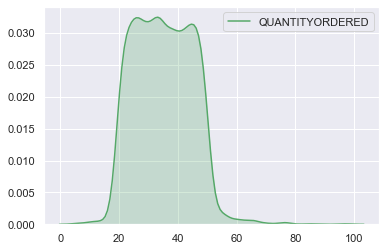

<IPython.core.display.Javascript object>

In [11]:
sns.kdeplot(df3["QUANTITYORDERED"], shade=True, color="g")
plt.show()

In [12]:
df3["CUSTOMERNAME"].value_counts()

Euro Shopping Channel                 259
Mini Gifts Distributors Ltd.          180
Australian Collectors, Co.             55
La Rochelle Gifts                      53
AV Stores, Co.                         51
Land of Toys Inc.                      49
Rovelli Gifts                          48
Muscle Machine Inc                     48
Souveniers And Things Co.              46
Anna's Decorations, Ltd                46
Dragon Souveniers, Ltd.                43
Saveley & Henriot, Co.                 41
Corporate Gift Ideas Co.               41
Reims Collectables                     41
Salzburg Collectables                  40
The Sharp Gifts Warehouse              40
L'ordine Souveniers                    39
Scandinavian Gift Ideas                38
Handji Gifts& Co                       36
Danish Wholesale Imports               36
Mini Creations Ltd.                    35
Online Diecast Creations Co.           34
Technics Stores Inc.                   34
Tokyo Collectables, Ltd           

<IPython.core.display.Javascript object>

In [13]:
top_5_customers = pd.DataFrame(df3["CUSTOMERNAME"].value_counts().head()).reset_index()
top_5_customers

index  CUSTOMERNAME
0         Euro Shopping Channel           259
1  Mini Gifts Distributors Ltd.           180
2    Australian Collectors, Co.            55
3             La Rochelle Gifts            53
4                AV Stores, Co.            51

<IPython.core.display.Javascript object>

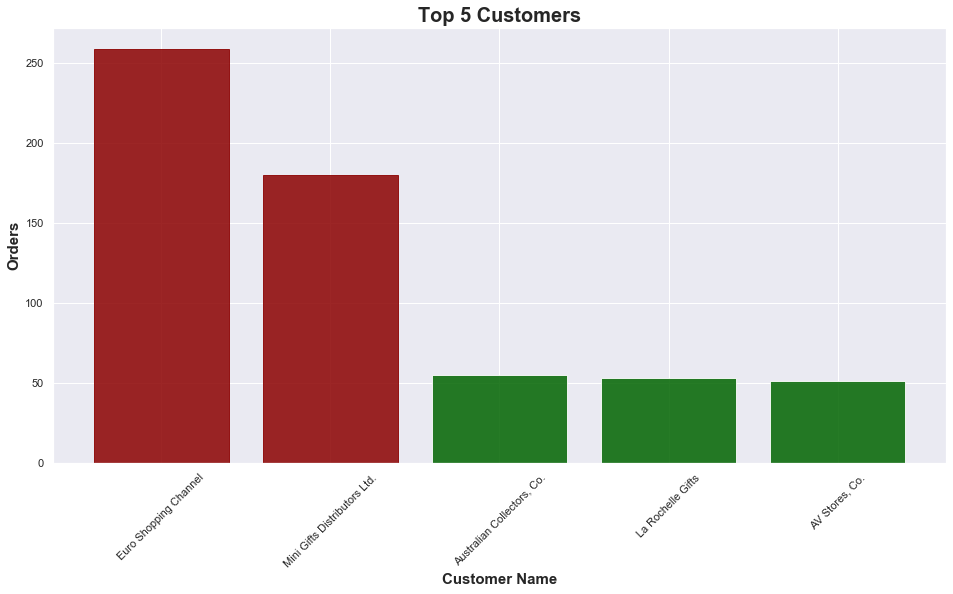

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(16, 8))
barplot = plt.bar(
    top_5_customers.iloc[:, 0],
    top_5_customers.iloc[:, 1],
    color="darkgreen",
    alpha=0.85,
)
barplot[0].set_color("darkred")
barplot[1].set_color("darkred")
plt.xlabel("Customer Name", fontsize=15, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Orders", fontsize=15, weight="bold")
plt.title("Top 5 Customers", fontsize=20, weight="bold")
plt.show()

We have additional confirmation with the dist plot and customer name's list about the wholesale nature of our business. Our customers include shopping networks as well as gift and toy stores. It is intereting to note that all of our customers are repeat customers. 

In [15]:
quantity_months = df3.groupby(["MONTH_ID"])["QUANTITYORDERED"].count()
quantity_months

MONTH_ID
1     229
2     224
3     212
4     178
5     252
6     131
7     141
8     191
9     171
10    317
11    597
12    180
Name: QUANTITYORDERED, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
sales_month = pd.DataFrame(df3.groupby(["MONTH_ID"])["SALES"].sum()).reset_index()
sales_month

MONTH_ID       SALES
0          1   785874.44
1          2   810441.90
2          3   754501.39
3          4   669390.96
4          5   923972.56
5          6   454756.78
6          7   514875.97
7          8   659310.57
8          9   584724.27
9         10  1121215.22
10        11  2118885.67
11        12   634679.12

<IPython.core.display.Javascript object>

In [17]:
sales_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH_ID  12 non-null     int64  
 1   SALES     12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


<IPython.core.display.Javascript object>

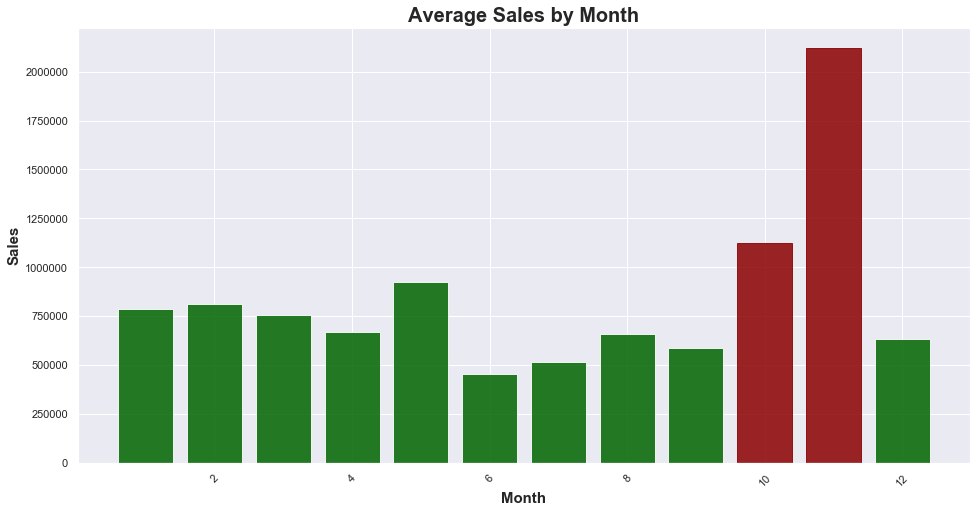

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(16, 8))
barplot = plt.bar(
    sales_month.iloc[:, 0], sales_month.iloc[:, 1], color="darkgreen", alpha=0.85
)
barplot[9].set_color("darkred")
barplot[10].set_color("darkred")
plt.xlabel("Month", fontsize=15, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Sales", fontsize=15, weight="bold")
plt.title("Average Sales by Month", fontsize=20, weight="bold")
plt.show()

We see that our customers are ordering a higher volume of product and also spending more money on our products in October and November. This is most likely in anticipation of the holiday season. The National Retail Federation states that retailers make about 19% of their yearly profit in the two months of November and December, [while some retailers make even more.](https://nrf.com/insights/holiday-and-seasonal-trends/winter-holidays/winter-holiday-faqs#:~:text=Overall%2C%20holiday%20sales%20in%20November,be%20higher%20for%20some%20retailers)

In [19]:
data_months = df3.groupby(["YEAR_ID", "MONTH_ID"]).count()
data_months

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  SALES  \
YEAR_ID MONTH_ID                                                       
2003    1                      39         39               39     39   
        2                      41         41               41     41   
        3                      50         50               50     50   
        4                      58         58               58     58   
        5                      58         58               58     58   
        6                      46         46               46     46   
        7                      50         50               50     50   
        8                      58         58               58     58   
        9                      76         76               76     76   
        10                    158        158              158    158   
        11                    296        296              296    296   
        12                     70         70               70     70   
2004    1                      91         91               91     91   
        2                      86         86               86     86   
        3                      56         56               56     56   
        4                      64         64               64     64   
        5                      74         74               74     74   
        6                      85         85               85     85   
        7                      91         91               91     91   
        8                     133        133              133    133   
        9                      95         95               95     95   
        10                    159        159              159    159   
        11                    301        301              301    301   
        12                    110        110              110    110   
2005    1                      99         99               99     99   
        2                      97         97               97     97   
        3                     106        106              106    106   
        4                      56         56               56     56   
        5                     120        120              120    120   

                  ORDERDATE  QTR_ID  PRODUCTLINE  MSRP  PRODUCTCODE  \
YEAR_ID MONTH_ID                                                      
2003    1                39      39           39    39           39   
        2                41      41           41    41           41   
        3                50      50           50    50           50   
        4                58      58           58    58           58   
        5                58      58           58    58           58   
        6                46      46           46    46           46   
        7                50      50           50    50           50   
        8                58      58           58    58           58   
        9                76      76           76    76           76   
        10              158     158          158   158          158   
        11              296     296          296   296          296   
        12               70      70           70    70           70   
2004    1                91      91           91    91           91   
        2                86      86           86    86           86   
        3                56      56           56    56           56   
        4                64      64           64    64           64   
        5                74      74           74    74           74   
        6                85      85           85    85           85   
        7                91      91           91    91           91   
        8               133     133          133   133          133   
        9                95      95           95    95           95   
        10              159     159          159   159          159   
        11              301     301          301   301          301   
        12

<IPython.core.display.Javascript object>

We do see that our customer sales data spans not quite 3 years, but more accurately 29 months. 

While looking at the data by month has been interesting, we are going to drop the MONTH_ID in favor of QTR_ID since we at The Amazing Model Toy Company make our production and marketing decisions by the quarter, not by the month. 

In [20]:
# drop unuseful columne orderline and redudant column month_id
df4 = df3.drop(["ORDERLINENUMBER", "MONTH_ID"], axis=1)

<IPython.core.display.Javascript object>

In [21]:
df4.describe(include="O")

ORDERDATE   PRODUCTLINE PRODUCTCODE           CUSTOMERNAME  \
count              2823          2823        2823                   2823   
unique              252             7         109                     92   
top     11/14/2003 0:00  Classic Cars    S18_3232  Euro Shopping Channel   
freq                 38           967          52                    259   

       COUNTRY DEALSIZE  
count     2823     2823  
unique      19        3  
top        USA   Medium  
freq      1004     1384

<IPython.core.display.Javascript object>

In [22]:
df4.PRODUCTLINE.value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

<IPython.core.display.Javascript object>

We see that our most popular product lines are our two car categories.

Text(0.5, 1.0, 'Orders by Country')

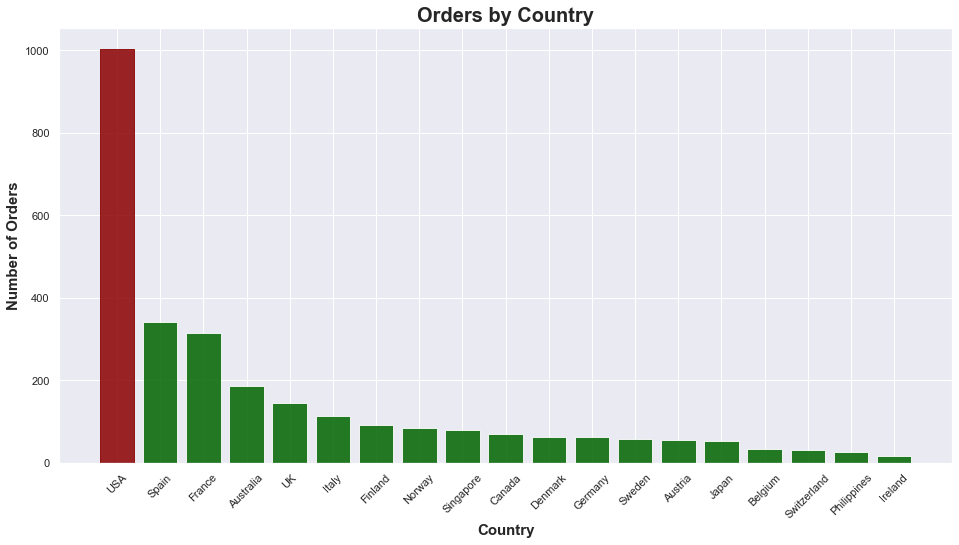

<IPython.core.display.Javascript object>

In [23]:
country = pd.DataFrame(df4.groupby(["COUNTRY"])["CUSTOMERNAME"].count()).reset_index()
country = country.sort_values(by=["CUSTOMERNAME"], ascending=False)

plt.figure(figsize=(16, 8))
barplot = plt.bar(country.iloc[:, 0], country.iloc[:, 1], color="darkgreen", alpha=0.85)
barplot[0].set_color("darkred")
plt.xlabel("Country", fontsize=15, weight="bold")
plt.xticks(rotation=45)
plt.ylabel("Number of Orders", fontsize=15, weight="bold")
plt.title("Orders by Country", fontsize=20, weight="bold")

In [24]:
len(country)

19

<IPython.core.display.Javascript object>

19 countries represent our clientele. The United States makes up over a third of our orders. The rest of our orders mostly come from European countries.

In [25]:
print("Number of Object Columns:", df4.select_dtypes(object).shape[1])
print("Number of Numeric Columns:", df4.select_dtypes(["integer", "float"]).shape[1])

Number of Object Columns: 6
Number of Numeric Columns: 6


<IPython.core.display.Javascript object>

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   QTR_ID           2823 non-null   int64  
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   PRODUCTCODE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  COUNTRY          2823 non-null   object 
 11  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 264.8+ KB


<IPython.core.display.Javascript object>

We see that we have 8 categorical features and 4 continuous. As noted earlier QTR_ID and YEAR_ID are numeric columns, but are also categorical features. 

With mixed data we need to find a way to distance weight and scale both our continuous and categorical features. One way to accomplish this is to use a gower distance matrix. Gower uses Manhattan Distance for continuous features, and Dice Dissimiliarity for categorical features. Not only does gower distance weight both our continuous and categorical features, it also scales our features from 0 to 1. We can then use our gower matrix for dimensionality reduction or to feed it directly into a model.

In [27]:
import gower

dist_matrix = gower.gower_matrix(df4)

<IPython.core.display.Javascript object>

In [28]:
dist_matrix

array([[0.        , 0.29843915, 0.40626514, ..., 0.6346204 , 0.56530017,
        0.5978967 ],
       [0.29843915, 0.        , 0.30630118, ..., 0.67573357, 0.48908326,
        0.6340788 ],
       [0.40626514, 0.30630118, 0.        , ..., 0.5916546 , 0.6287178 ,
        0.59038395],
       ...,
       [0.6346204 , 0.67573357, 0.5916546 , ..., 0.        , 0.4048376 ,
        0.33506298],
       [0.56530017, 0.48908326, 0.6287178 , ..., 0.4048376 , 0.        ,
        0.3826562 ],
       [0.5978967 , 0.6340788 , 0.59038395, ..., 0.33506298, 0.3826562 ,
        0.        ]], dtype=float32)

<IPython.core.display.Javascript object>

In [29]:
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import prince

<IPython.core.display.Javascript object>

### FAMD Dimensionality Reduction

Since we have both continuous and categorical features let's first try to reduce dimensions using factor analysis before clustering. Factor Analysis is akin to doing pca on continuous features and mca on categorical ones. We will compare this to both t-SNE and UMAP approaches. 

In [30]:
famd = prince.FAMD()
famd.fit(df4)
famd_coordinates = famd.transform(df4)
famd_coordinates.columns = ["0", "1"]

<IPython.core.display.Javascript object>

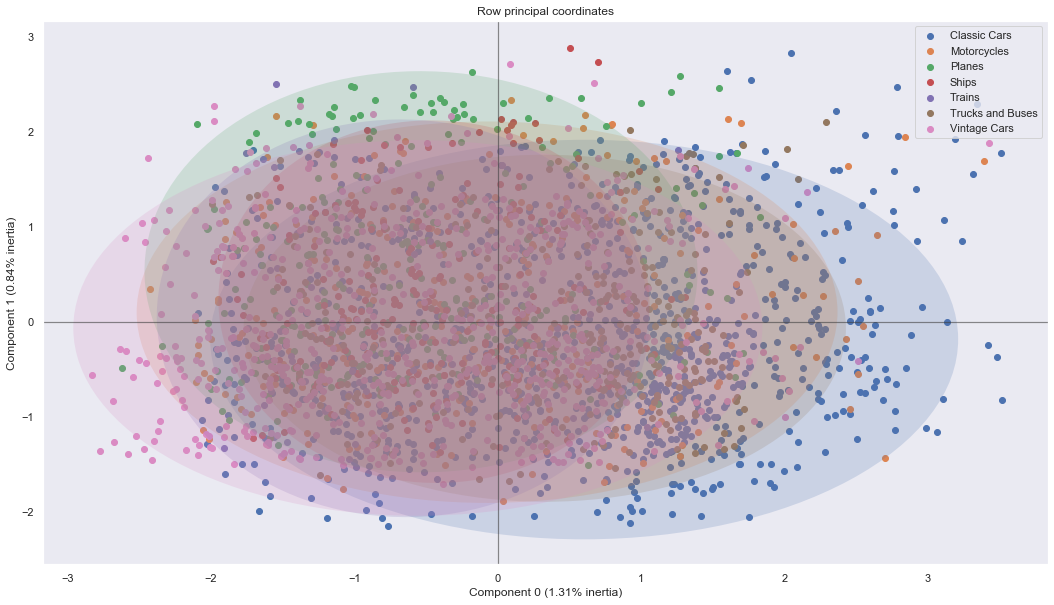

<IPython.core.display.Javascript object>

In [31]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["PRODUCTLINE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

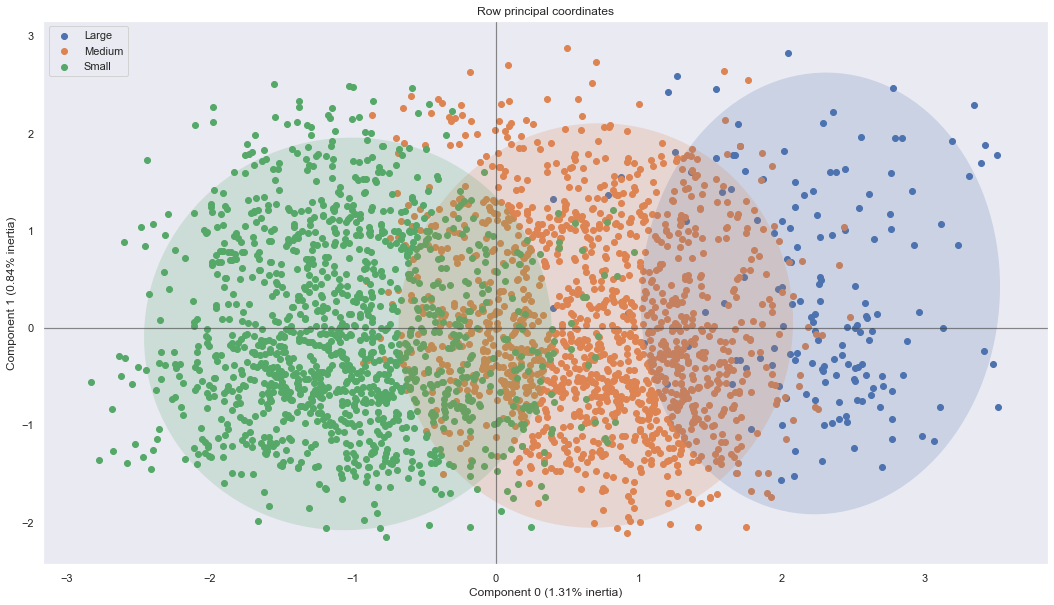

<IPython.core.display.Javascript object>

In [32]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["DEALSIZE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

FAMD is definitely differentiating by deal size. 

### FAMD K-Means
Next, we will look at our FAMD coordinates fed into 3 different models (K-Means, Gaussian Mixture, DB Scan). We will look at silhouette scores as a reference point, but will place more importance on the explanatory power of our clusters than anything else. First, let's take a look at K-Means. 

In [33]:
inertia = []
silhouette = []
k_range = range(2, 31)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(famd_coordinates)
    inertia.append(k_means.inertia_)
    pred = k_means.predict(famd_coordinates)
    silhouette.append(silhouette_score(famd_coordinates, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

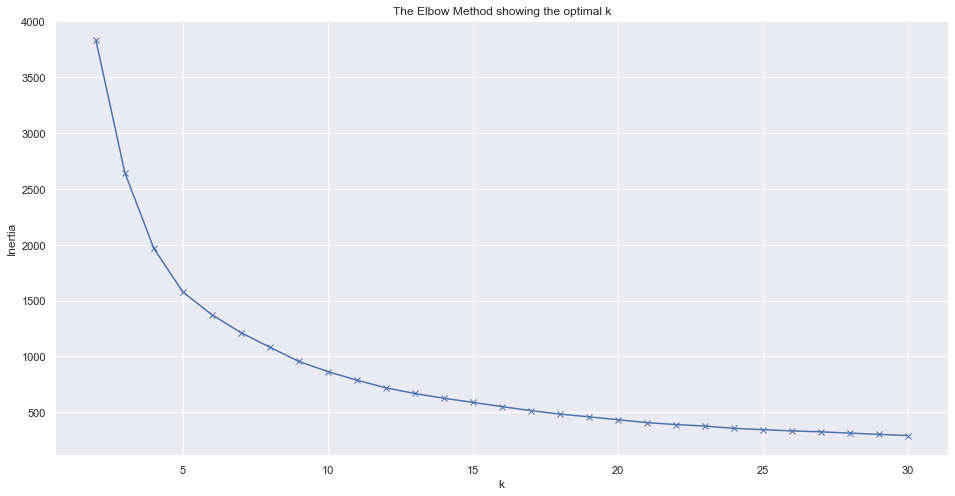

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("The Elbow Method showing the optimal k")
plt.show()

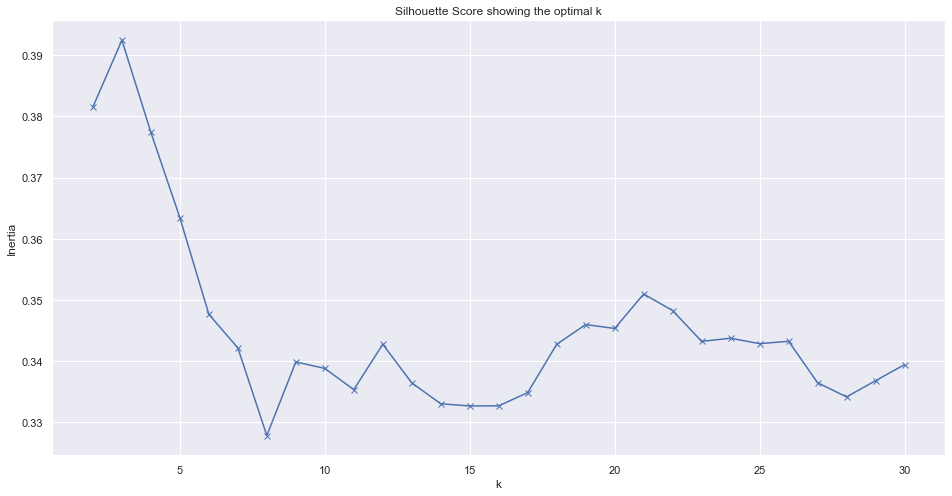

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, silhouette, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=3)

kmeans.fit_predict(famd_coordinates)
y_kmeans = kmeans.predict(famd_coordinates)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=famd_coordinates.columns)
centers.style.background_gradient()

<IPython.core.display.Javascript object>

In [37]:
df4["K_CLUSTER_FAMD"] = kmeans.fit_predict(famd_coordinates)
df4["K_CLUSTER_FAMD"].value_counts()

2    1060
1    1049
0     714
Name: K_CLUSTER_FAMD, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
X_famd = famd_coordinates.copy()
X_famd["K_means"] = y_kmeans

<IPython.core.display.Javascript object>

In [39]:
X_famd.head()

0         1  K_means
0 -0.245619 -0.436650        0
1 -0.449061  0.306518        0
2  0.549174 -0.340770        1
3  0.234291 -0.449157        1
4  0.782662 -1.015238        1

<IPython.core.display.Javascript object>

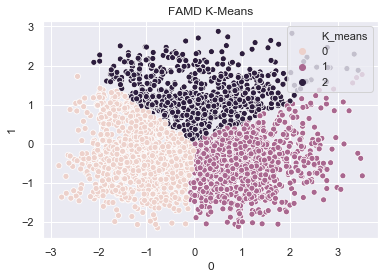

<IPython.core.display.Javascript object>

In [40]:
plt.title("FAMD K-Means")
sns.scatterplot(x="0", y="1", hue="K_means", data=X_famd)

In [41]:
cluster = df4.groupby("K_CLUSTER_FAMD").mean()
cluster.style.background_gradient()

<IPython.core.display.Javascript object>

In [42]:
df4.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ORDERDATE     2823 non-null   object
 1   PRODUCTLINE   2823 non-null   object
 2   PRODUCTCODE   2823 non-null   object
 3   CUSTOMERNAME  2823 non-null   object
 4   COUNTRY       2823 non-null   object
 5   DEALSIZE      2823 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


<IPython.core.display.Javascript object>

In [43]:
pd.crosstab(df4["DEALSIZE"], df4["K_CLUSTER_FAMD"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

In [44]:
pd.crosstab(df4["PRODUCTLINE"], df4["K_CLUSTER_FAMD"]).style.background_gradient()

<IPython.core.display.Javascript object>

In [45]:
pd.crosstab(df4["COUNTRY"], df4["K_CLUSTER_FAMD"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

Cluster 0 is has the smaller volume of orders at 735. The average time of year for Cluster 0 orders is in the first half of the year. Cluster 0 is also the middle rank on all the deal size types. These are our reliable year round customers. We see some European countries like Germany, Belgium, Denmark, Norway, Sweden, and the United Kingdom underrepresented in Cluster 0. Perhaps our customers from these countires are more cyclical. 

Cluster 1 and 2 are most likely our holiday season customers. The average order is placed in the 3rd quarter probably in preperation to have the products on the shelves by the 4th quarter (Holiday Season). The difference between cluster 1 and cluster 2 is the deal size. Cluster 1 is almost exclusively small deals, while cluster 2 is almost exclusively medium and large deals. 

The problem is that our clusters are explanatory, but the data appears to be one giant cluster. The K-Means model results look artificial. Let's see if a Gaussian Mixture model is any better. 

### FAMD GMM

In [46]:
from sklearn.mixture import GaussianMixture

silhouette = []
n_range = range(2, 31)

for n in n_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(famd_coordinates)
    # inertia.append(gmm.inertia_)
    pred = gmm.predict(famd_coordinates)
    silhouette.append(silhouette_score(famd_coordinates, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

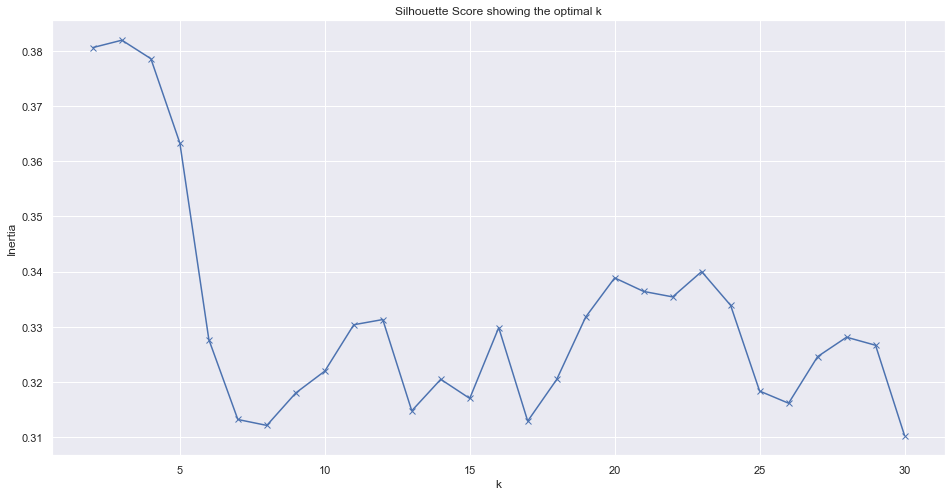

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, silhouette, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [48]:
gmm = GaussianMixture(n_components=4, covariance_type="full")

gmm.fit_predict(famd_coordinates)
y_gmm = gmm.predict(famd_coordinates)

centers = pd.DataFrame(gmm.means_, columns=famd_coordinates.columns)
centers.style.background_gradient()

<IPython.core.display.Javascript object>

In [49]:
X_famd = famd_coordinates.copy()
X_famd["GMM"] = y_gmm

<IPython.core.display.Javascript object>

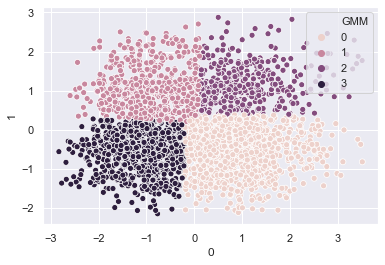

<IPython.core.display.Javascript object>

In [50]:
sns.scatterplot(x="0", y="1", hue="GMM", data=X_famd)

Similiar to the FAMD K-Means approach our clusters don't appear to be seperable. This really appears to be one giant cluster. The fact the data looks like one giant cluster is most likely the result of the FAMD dimensionality reduction, not because of K-Means or GMM implementations. 

### FAMD DB Scan
Let's see if perhaps a model like DB Scan will help with this type of data. 

In [51]:
min_samples_list = range(2, 10)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

Number of clusters when min_samples=2 is: 1
Number of clusters when min_samples=3 is: 1
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1


<IPython.core.display.Javascript object>

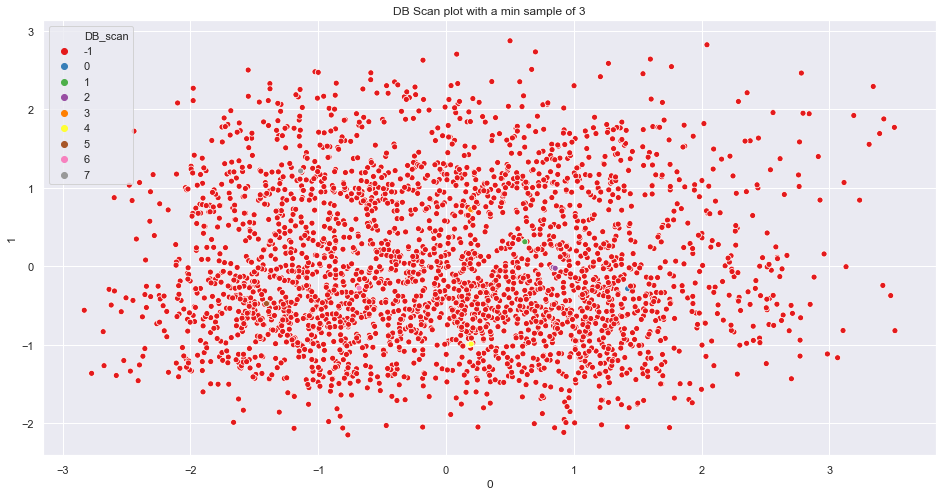

Number of clusters when min_samples=3 is: 9


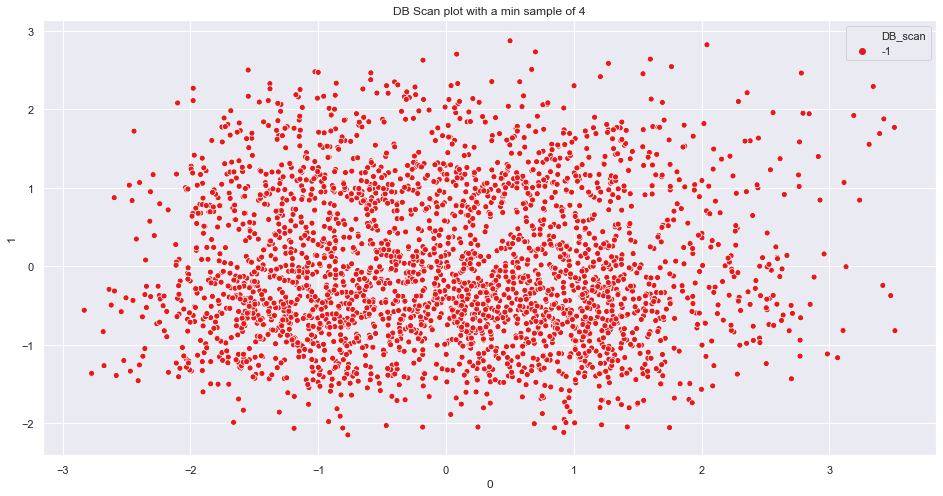

Number of clusters when min_samples=4 is: 1


<IPython.core.display.Javascript object>

In [52]:
min_samples_list = range(3, 5)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=0.01, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    X_umap = famd_coordinates.copy()
    X_umap.columns = ["0", "1"]
    X_umap["DB_scan"] = clusters
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x="0", y="1", hue="DB_scan", data=X_umap, palette="Set1")
    plt.title(f"DB Scan plot with a min sample of {i}")
    plt.show()
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

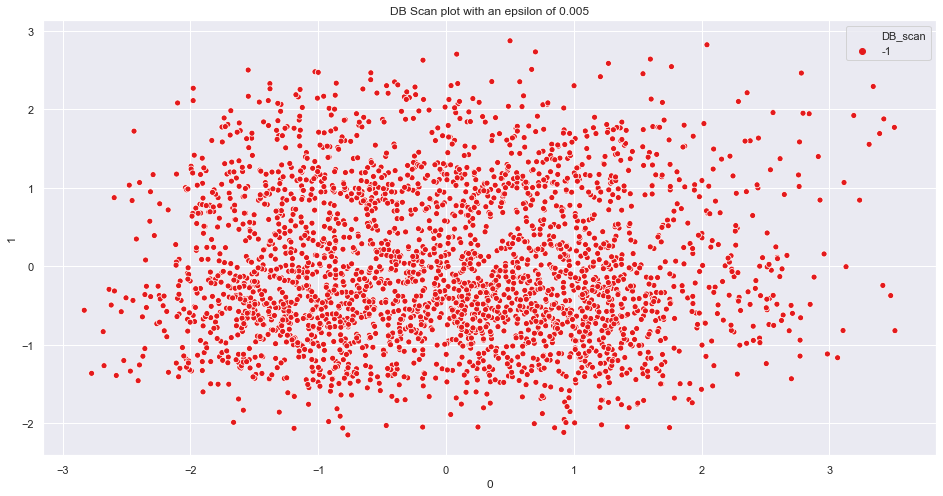

Number of clusters when epsilon = 0.005 is: 1
-1    2823
Name: DB_scan, dtype: int64


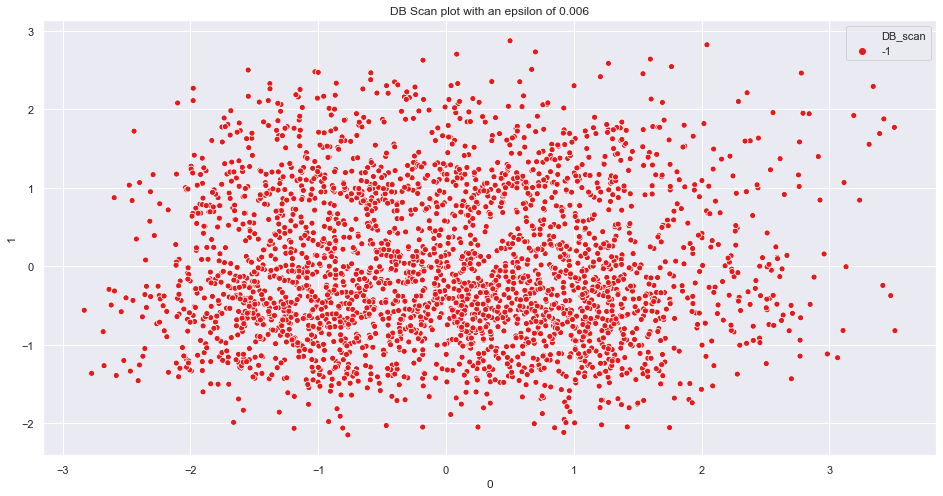

Number of clusters when epsilon = 0.006 is: 1
-1    2823
Name: DB_scan, dtype: int64


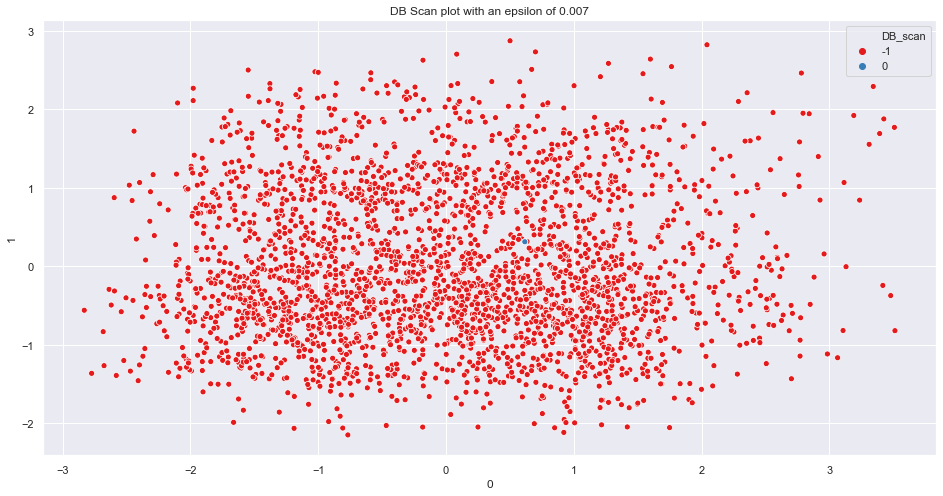

Number of clusters when epsilon = 0.007 is: 2
-1    2820
 0       3
Name: DB_scan, dtype: int64


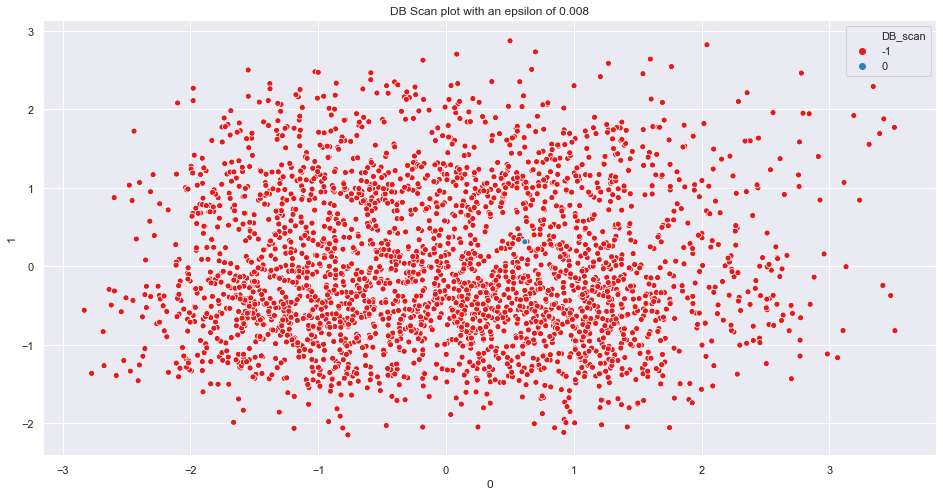

Number of clusters when epsilon = 0.008 is: 2
-1    2820
 0       3
Name: DB_scan, dtype: int64


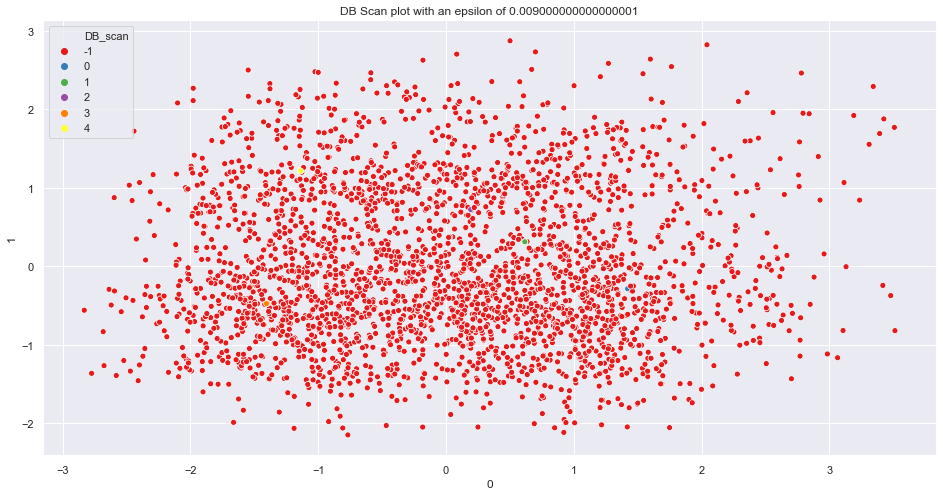

Number of clusters when epsilon = 0.009000000000000001 is: 6
-1    2808
 3       3
 1       3
 4       3
 2       3
 0       3
Name: DB_scan, dtype: int64


<IPython.core.display.Javascript object>

In [53]:
for i in np.arange(0.005, 0.01, 0.001):
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    X_famd = famd_coordinates.copy()
    X_famd.columns = ["0", "1"]
    X_famd["DB_scan"] = clusters
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x="0", y="1", hue="DB_scan", data=X_famd, palette="Set1")
    plt.title(f"DB Scan plot with an epsilon of {i}")
    plt.show()
    print(
        "Number of clusters when epsilon = {} is: {}".format(
            i, len(np.unique(clusters))
        )
    )
    print(X_famd["DB_scan"].value_counts())

In [54]:
for i in [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(famd_coordinates)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=0.01 is: 9
Number of clusters when eps=0.1 is: 63
Number of clusters when eps=1 is: 1
Number of clusters when eps=2 is: 1
Number of clusters when eps=3 is: 1
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


<IPython.core.display.Javascript object>

Looking at the DB Scan results our cluster numbers seemed reasonable at first glance. But once plotted it is clear that DB Scan is not helpful with this dataset, because it treats most of the data points as outliers.

### t-SNE Dimensionality Reduction
Perhaps there are more non-linear features in our data set than we realize. t-SNE is an excellent way to reduce the dimensions of non-linear data. Let's take a look at our data with t-SNE. 

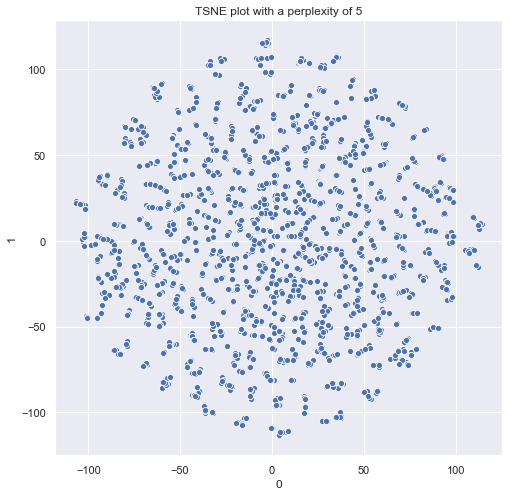

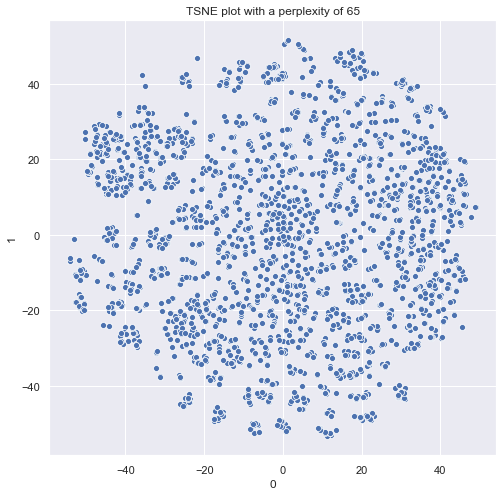

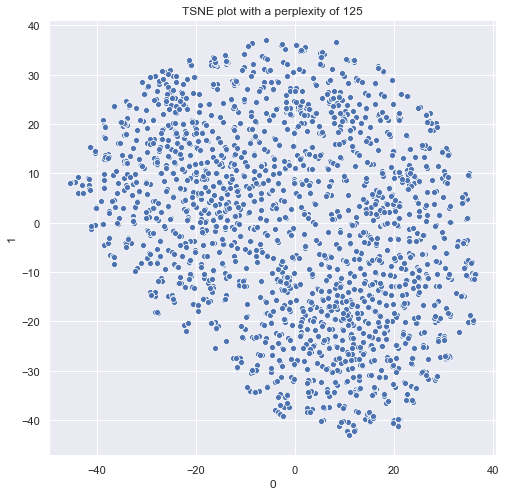

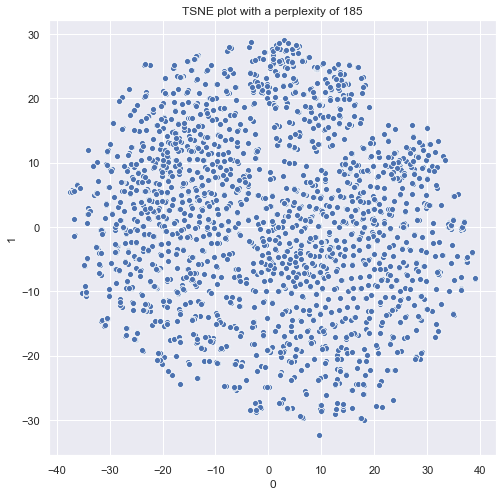

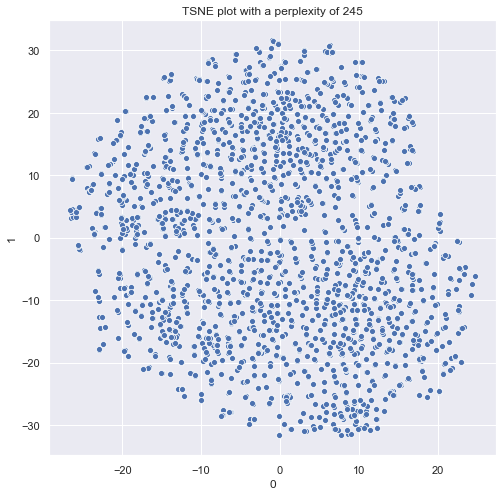

<IPython.core.display.Javascript object>

In [55]:
from sklearn.manifold import TSNE

for p in range(5, 300, 60):
    tsne = TSNE(perplexity=p, n_components=2, metric="precomputed")
    tsne_components = pd.DataFrame(tsne.fit_transform(dist_matrix), columns=["0", "1"])
    # tsne_components["Clusters"] = tsne.fit_transform(dist_matrix)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x="0", y="1", data=tsne_components, ax=ax)
    plt.title(f"TSNE plot with a perplexity of {p}")
    plt.show()

We don't see much seperability with our data using t-SNE, even with varying degrees of perplexity. 

### UMAP Dimensionality Reduction
Since we don't see much seperablity let's try UMAP as our last dimensionality reduction technique. UMAP is a relatively new algorithm, but its really good a preserving the data's local and global structure. 

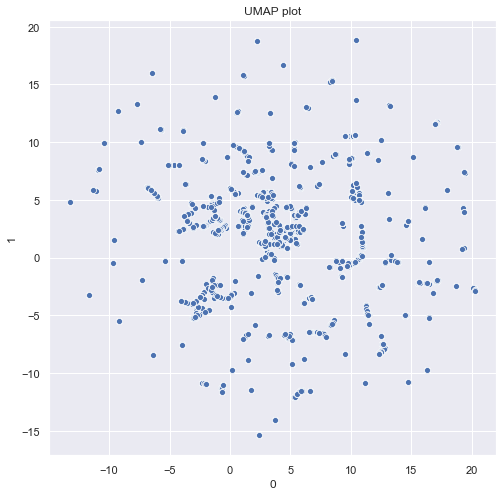

<IPython.core.display.Javascript object>

In [56]:
import umap

U = umap.UMAP(n_neighbors=5, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

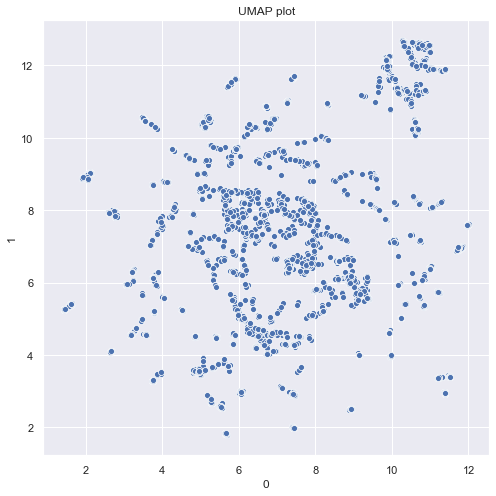

<IPython.core.display.Javascript object>

In [57]:
U = umap.UMAP(n_neighbors=25, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

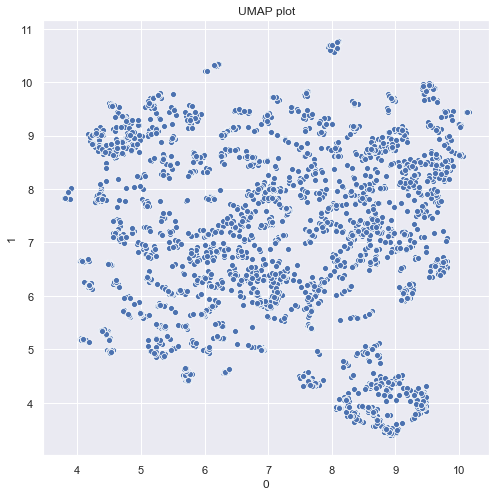

<IPython.core.display.Javascript object>

In [58]:
U = umap.UMAP(n_neighbors=100, min_dist=0.01, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

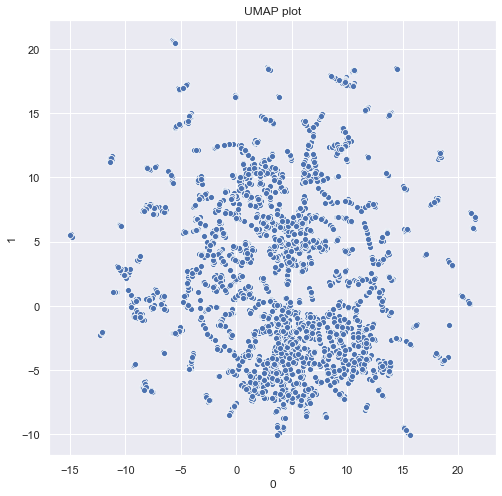

<IPython.core.display.Javascript object>

In [59]:
U = umap.UMAP(n_neighbors=5, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

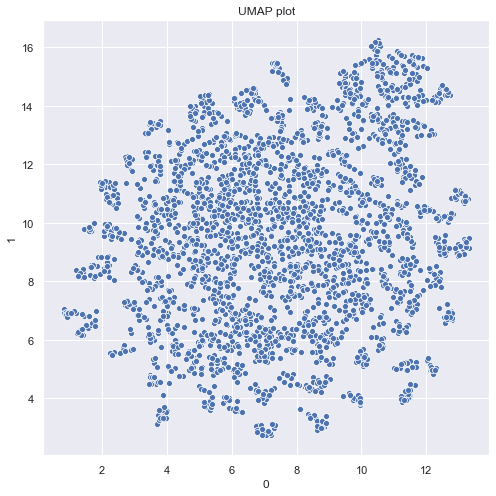

<IPython.core.display.Javascript object>

In [60]:
U = umap.UMAP(n_neighbors=25, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

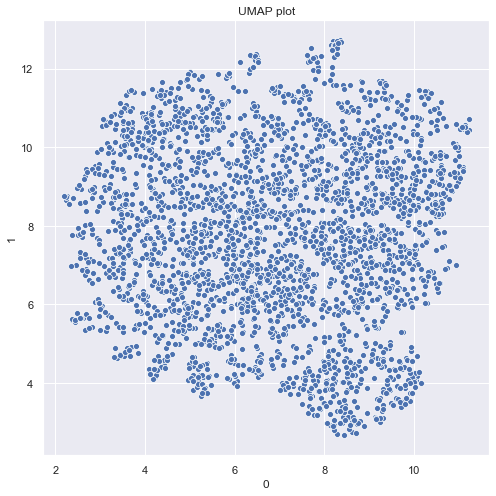

<IPython.core.display.Javascript object>

In [61]:
U = umap.UMAP(n_neighbors=100, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

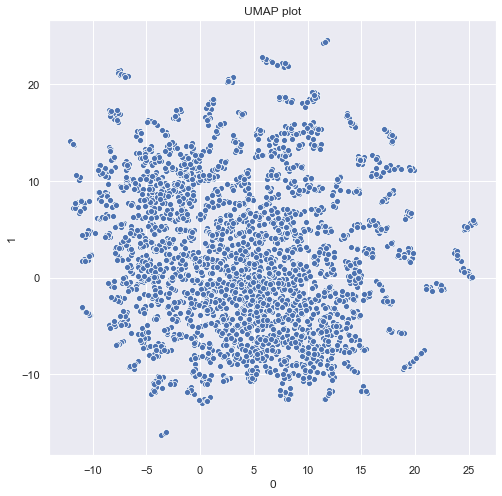

<IPython.core.display.Javascript object>

In [62]:
U = umap.UMAP(n_neighbors=5, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

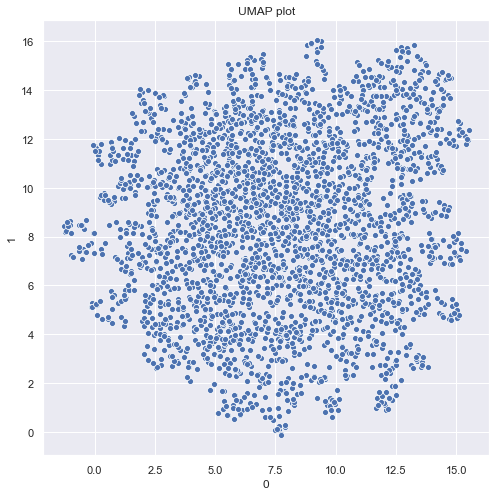

<IPython.core.display.Javascript object>

In [63]:
U = umap.UMAP(n_neighbors=25, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

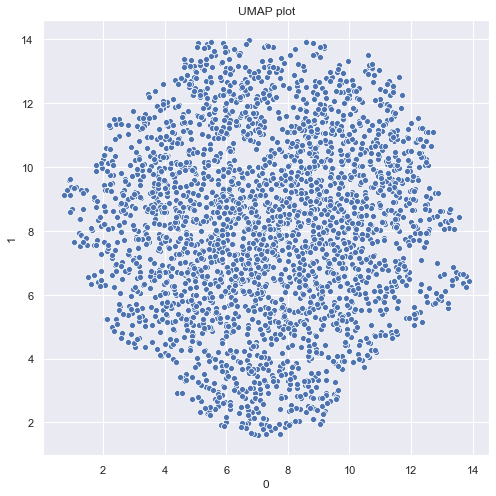

<IPython.core.display.Javascript object>

In [64]:
U = umap.UMAP(n_neighbors=100, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

We do see some seperablity and clustering with the UMAP approach. Let's try to fine tune parameters for maximum seperability.

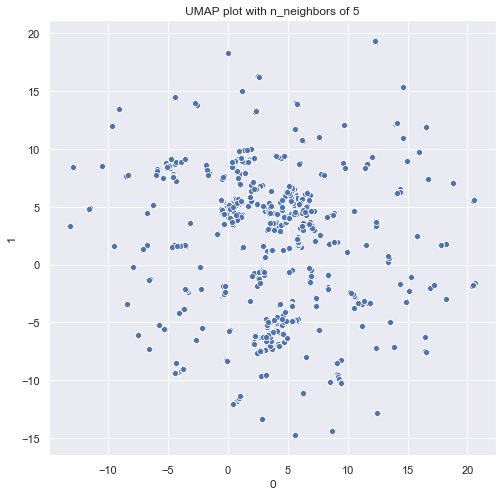

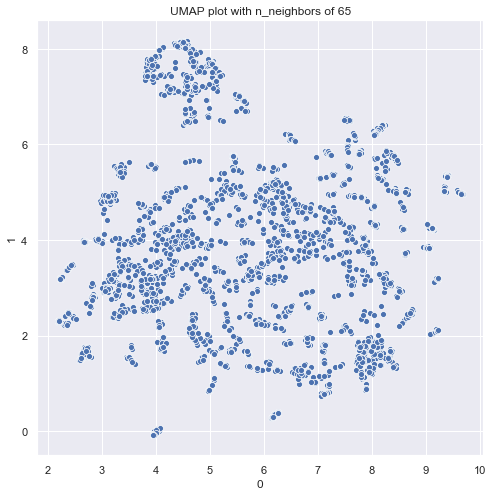

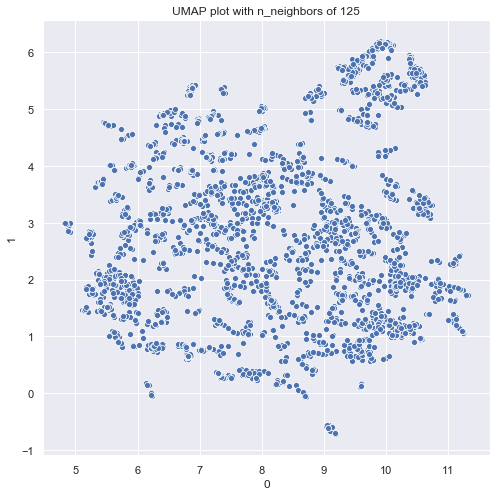

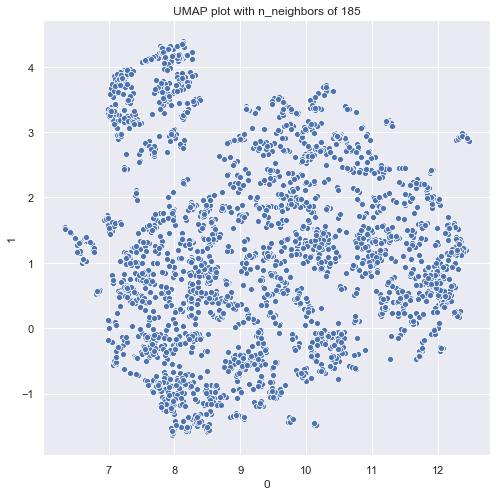

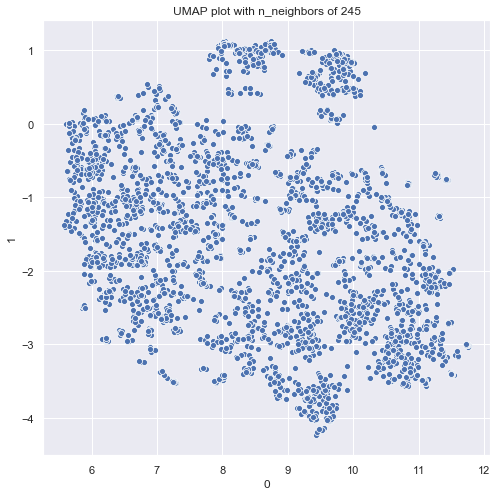

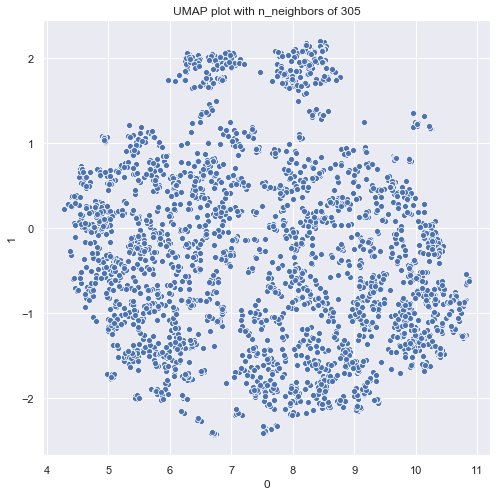

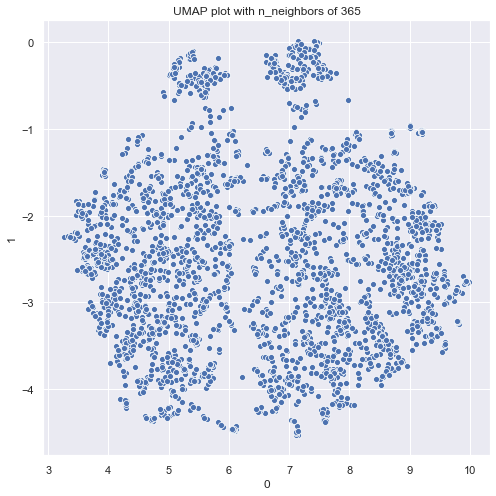

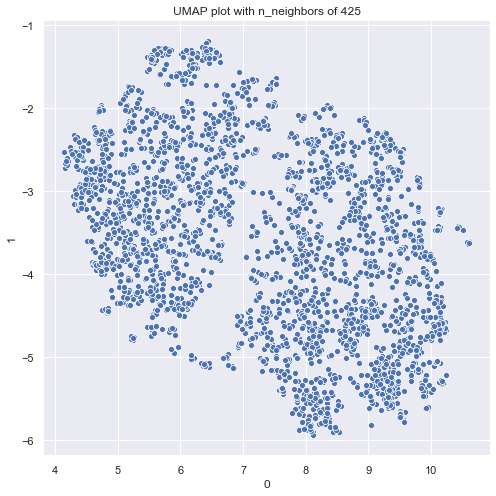

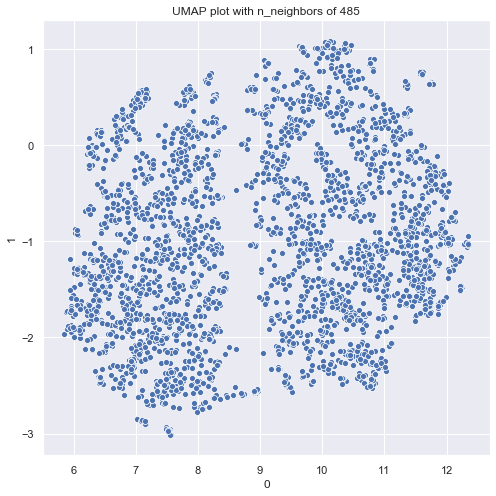

<IPython.core.display.Javascript object>

In [65]:
for n in range(5, 500, 60):
    U = umap.UMAP(n_neighbors=n, min_dist=0, metric="precomputed")
    umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
    plt.title(f"UMAP plot with n_neighbors of {n}")
    plt.show()

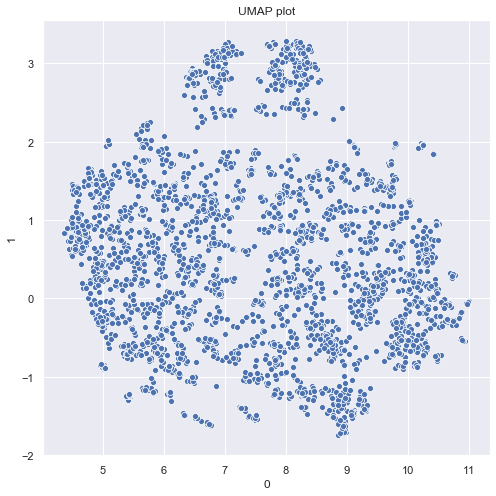

<IPython.core.display.Javascript object>

In [66]:
U = umap.UMAP(n_neighbors=245, min_dist=0, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

In [67]:
umap_model.columns = ["0", "1"]

<IPython.core.display.Javascript object>

With min_dist = 0 and n_neighbors = 245, the UMAP reduction seems to retain the most global structure while still preserving meaningful local details. Additionally we see some seperability between clusters with this approach. 

### UMAP DB Scan
Let's use these UMAP settings and plug them it into some models and see what kind of clusters we get. Since DB Scan performed so poorly with the FAMD approach let's start our UMAP exploration here and see if we find improvements. 

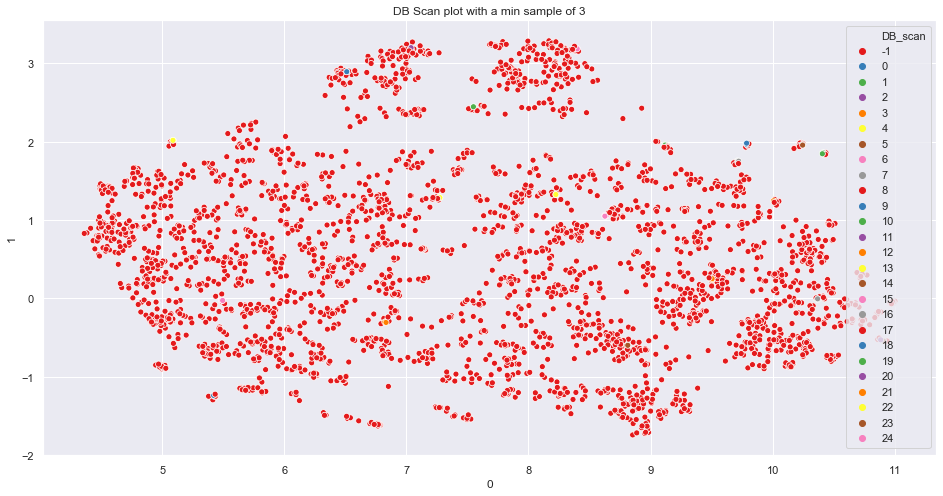

Number of clusters when min_samples=3 is: 26
-1     2735
 1       10
 0        5
 7        5
 15       4
 8        4
 20       3
 2        3
 4        3
 6        3
 10       3
 12       3
 14       3
 16       3
 18       3
 23       3
 22       3
 21       3
 3        3
 5        3
 9        3
 11       3
 13       3
 17       3
 19       3
 24       3
Name: DB_scan, dtype: int64


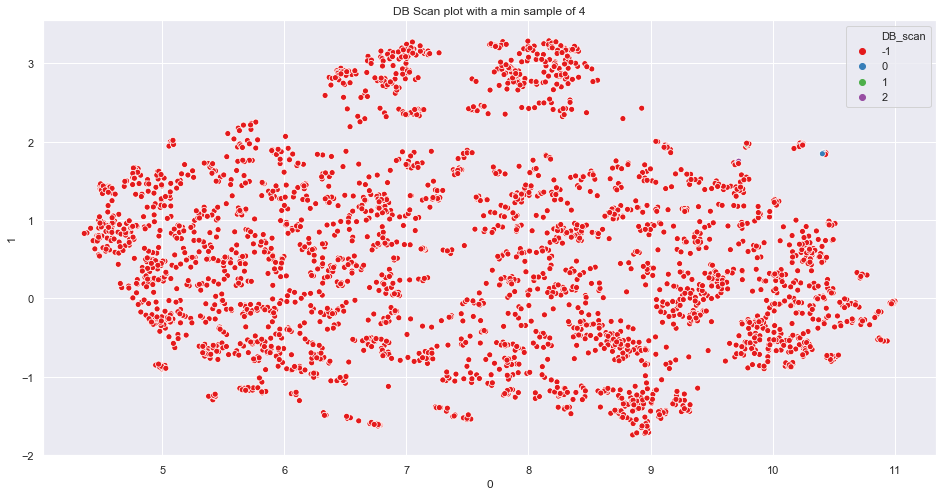

Number of clusters when min_samples=4 is: 4
-1    2804
 0      10
 2       5
 1       4
Name: DB_scan, dtype: int64


<IPython.core.display.Javascript object>

In [68]:
min_samples_list = range(3, 5)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=0.01, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(umap_model)
    X_umap = umap_model.copy()
    X_umap.columns = ["0", "1"]
    X_umap["DB_scan"] = clusters
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x="0", y="1", hue="DB_scan", data=X_umap, palette="Set1")
    plt.title(f"DB Scan plot with a min sample of {i}")
    plt.show()
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )
    print(X_umap["DB_scan"].value_counts())

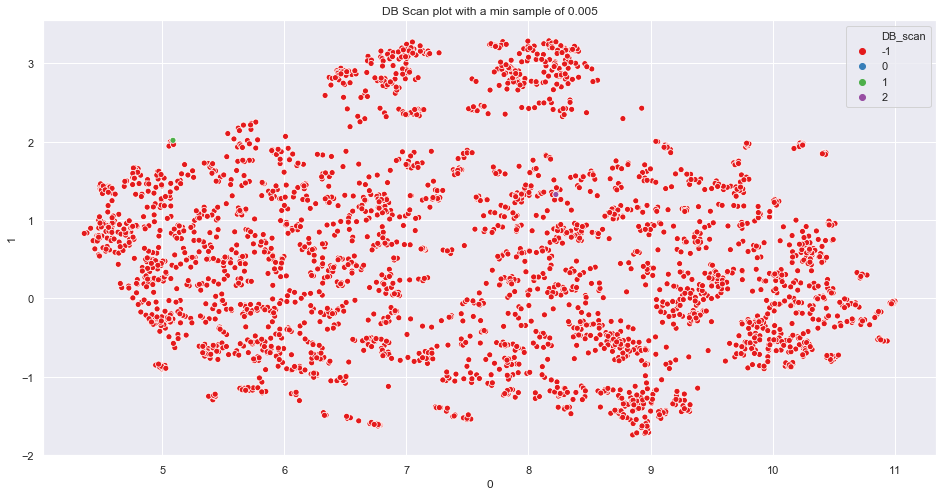

Number of clusters when min_samples=0.005 is: 4


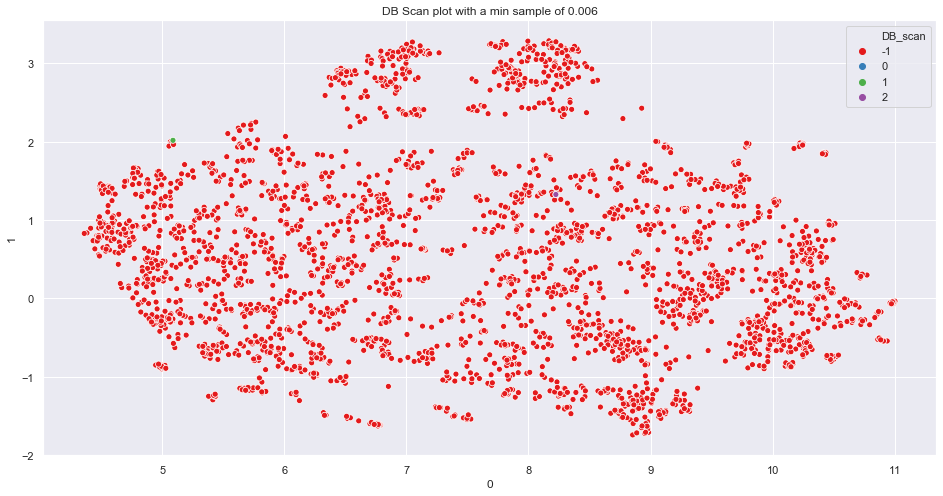

Number of clusters when min_samples=0.006 is: 4


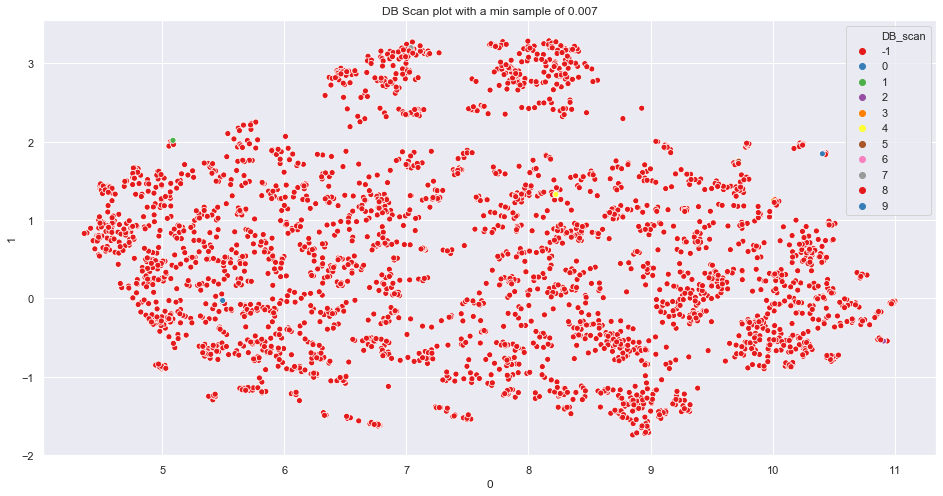

Number of clusters when min_samples=0.007 is: 11


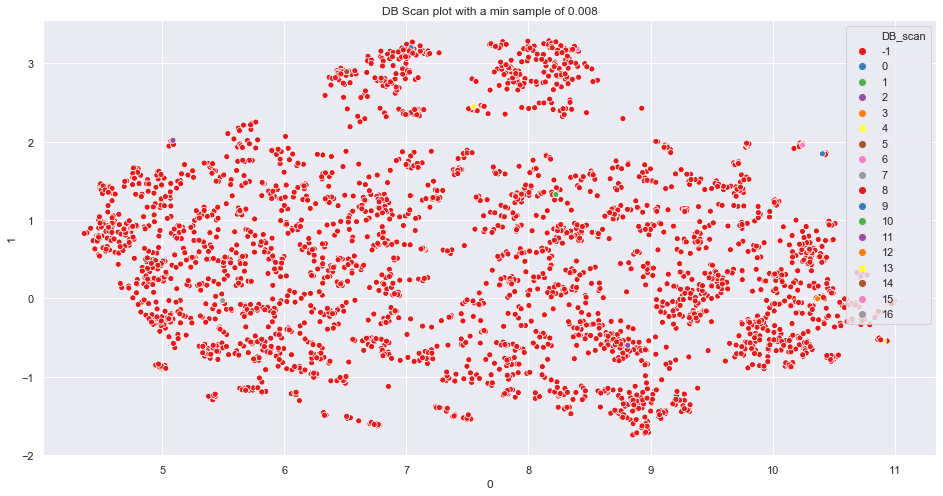

Number of clusters when min_samples=0.008 is: 18


<IPython.core.display.Javascript object>

In [69]:
for i in [0.005, 0.006, 0.007, 0.008]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(umap_model)
    X_umap = umap_model.copy()
    X_umap.columns = ["0", "1"]
    X_umap["DB_scan"] = clusters
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x="0", y="1", hue="DB_scan", data=X_umap, palette="Set1")
    plt.title(f"DB Scan plot with a min sample of {i}")
    plt.show()
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

In [70]:
for i in np.arange(0.005, 0.03, 0.001):
    dbscan_cluster = DBSCAN(eps=i, min_samples=3, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(umap_model)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=0.005 is: 4
Number of clusters when eps=0.006 is: 4
Number of clusters when eps=0.007 is: 11
Number of clusters when eps=0.008 is: 18
Number of clusters when eps=0.009000000000000001 is: 19
Number of clusters when eps=0.01 is: 26
Number of clusters when eps=0.011 is: 32
Number of clusters when eps=0.012 is: 46
Number of clusters when eps=0.013000000000000001 is: 55
Number of clusters when eps=0.014000000000000002 is: 67
Number of clusters when eps=0.015 is: 74
Number of clusters when eps=0.016 is: 81
Number of clusters when eps=0.017 is: 94
Number of clusters when eps=0.018000000000000002 is: 102
Number of clusters when eps=0.019 is: 119
Number of clusters when eps=0.02 is: 132
Number of clusters when eps=0.021 is: 137
Number of clusters when eps=0.022000000000000002 is: 150
Number of clusters when eps=0.023000000000000003 is: 158
Number of clusters when eps=0.024 is: 174
Number of clusters when eps=0.025 is: 183
Number of clusters when eps=0.026000000000000

<IPython.core.display.Javascript object>

DB Scan just doesn't fit this dataset well regardless of the method of dimensionality reduction chosen. Just like we saw before almost every data point is an outlier.

### UMAP K-Means
Let's try UMAP and K-Means and hope to see better results.

In [71]:
inertia = []
silhouette = []
k_range = range(2, 31)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(umap_model)
    inertia.append(k_means.inertia_)
    pred = k_means.predict(umap_model)
    silhouette.append(silhouette_score(umap_model, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

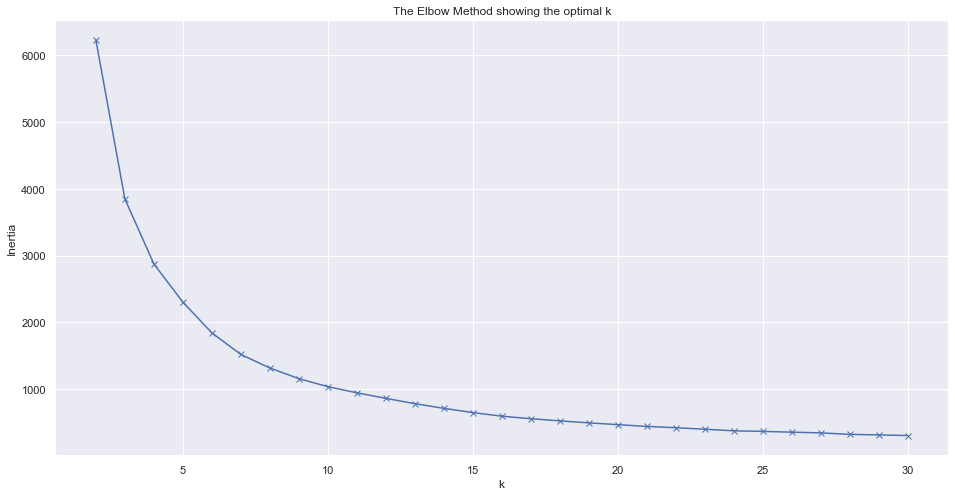

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("The Elbow Method showing the optimal k")
plt.show()

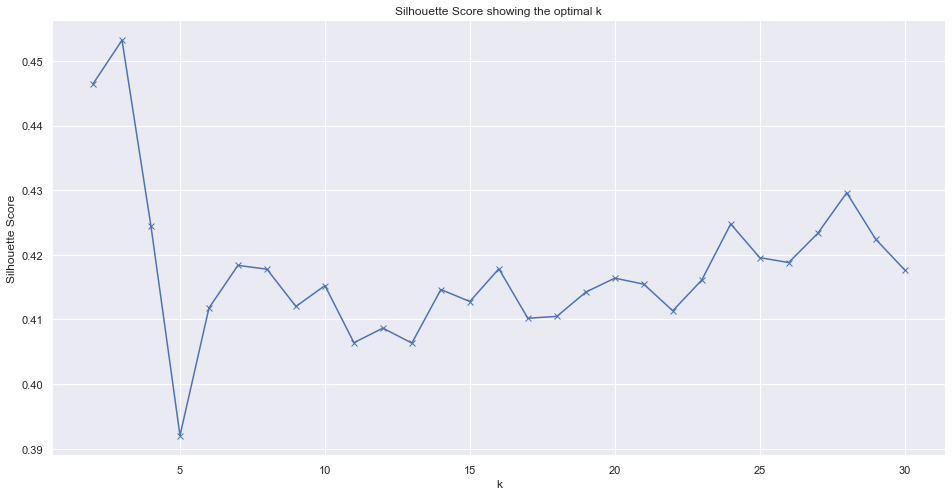

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, silhouette, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [74]:
kmeans = KMeans(n_clusters=3)

kmeans.fit_predict(umap_model)
y_kmeans = kmeans.predict(umap_model)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=umap_model.columns)
centers.style.background_gradient()

<IPython.core.display.Javascript object>

In [75]:
X_umap = umap_model.copy()
X_umap["K_means"] = y_kmeans

<IPython.core.display.Javascript object>

In [76]:
X_umap.head()

0         1  K_means
0  5.997973  0.535319        1
1  6.028444  1.142456        1
2  9.211292 -1.239989        0
3  8.952611 -1.721766        0
4  9.121197 -1.470999        0

<IPython.core.display.Javascript object>

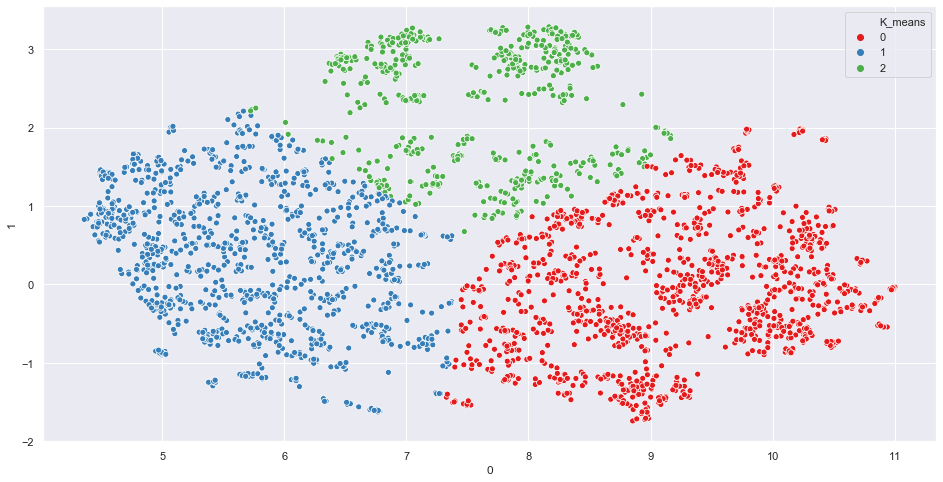

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="0", y="1", hue="K_means", data=X_umap, palette="Set1")

In [78]:
df4["K_CLUSTER_UMAP"] = kmeans.fit_predict(umap_model)

<IPython.core.display.Javascript object>

In [79]:
cluster = df4.groupby("K_CLUSTER_UMAP").mean()
cluster.style.background_gradient()

<IPython.core.display.Javascript object>

In [80]:
pd.crosstab(df4["DEALSIZE"], df4["K_CLUSTER_UMAP"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

In [81]:
pd.crosstab(df4["PRODUCTLINE"], df4["K_CLUSTER_UMAP"]).style.background_gradient()

<IPython.core.display.Javascript object>

In [82]:
pd.crosstab(df4["COUNTRY"], df4["K_CLUSTER_UMAP"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

We do see many similiarities with this 3 cluster UMAP K-Means solution and the 3 cluster FAMD K-Means solution from earlier. Like before we see a group that has many more early year orders than the other two groups. We see the same  split between small deal seasonal cluster and the medium/large deal seasonal cluster. 

With the UMAP approach we have the added benefit of higher silhouette scores. We see a silhouette score of about 0.46 vs 0.40 with the FAMD approach. There is also the added benefit that these clusters appears more natural (seperable) and not as artifical as the FAMD ones. 

### UMAP GMM
Since we appear to have some potential different shaped clusters (especially the island at the top middle of our UMAP model), let's take a look at GMM since it can handle different shaped clusters better than K-Means. 

In [83]:
silhouette = []
n_range = range(2, 31)

for n in n_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(umap_model)
    pred = gmm.predict(umap_model)
    silhouette.append(silhouette_score(umap_model, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

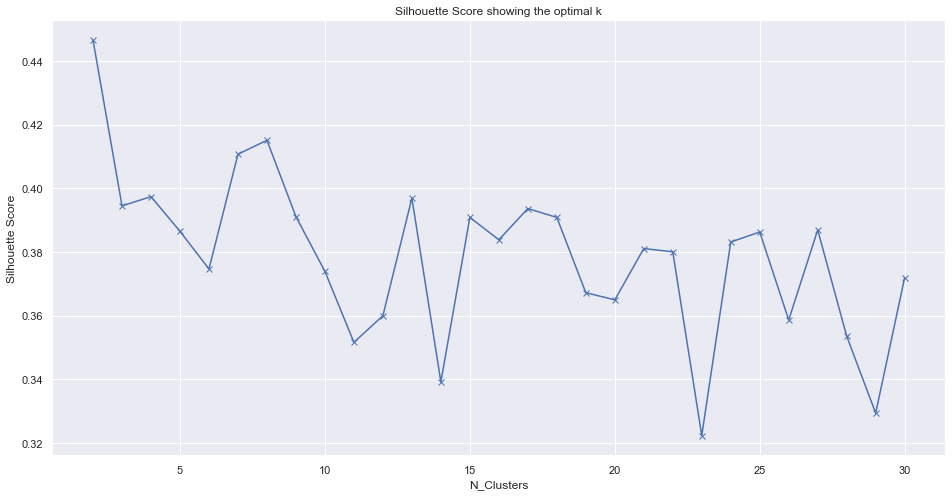

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(16, 8))
plt.plot(n_range, silhouette, "bx-")
plt.xlabel("N_Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score showing the optimal k")
plt.show()

In [85]:
gmm = GaussianMixture(n_components=5, covariance_type="full")

gmm.fit_predict(umap_model)
y_gmm = gmm.predict(umap_model)

centers = pd.DataFrame(gmm.means_, columns=umap_model.columns)
centers.style.background_gradient()

<IPython.core.display.Javascript object>

In [86]:
X_umap = umap_model.copy()
X_umap["GMM"] = y_gmm

<IPython.core.display.Javascript object>

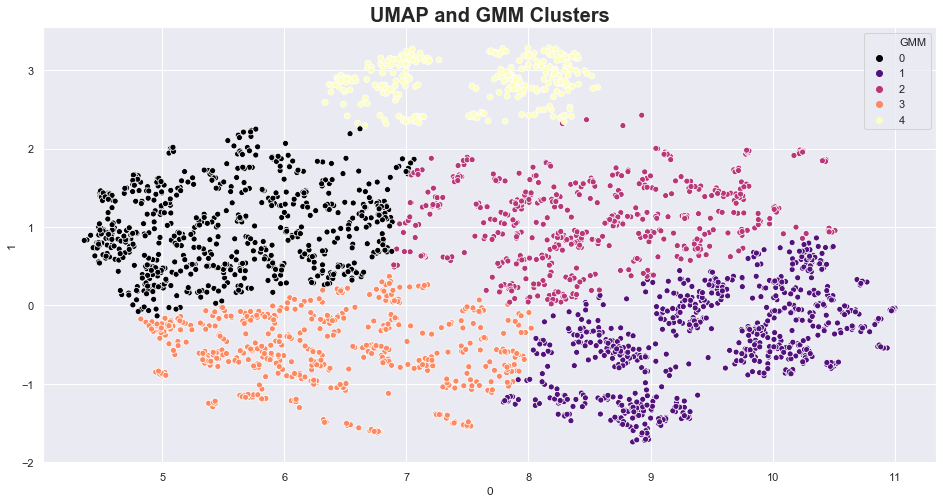

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(16, 8))
palette = "magma"
sns.scatterplot(x="0", y="1", hue="GMM", data=X_umap, palette=palette, legend="full")
plt.title("UMAP and GMM Clusters", fontsize=20, weight="bold")
plt.show()

In [88]:
df4["GMM_CLUSTER_UMAP"] = gmm.fit_predict(umap_model)

<IPython.core.display.Javascript object>

In [89]:
gmm_cluster = pd.DataFrame(df4.groupby("GMM_CLUSTER_UMAP").mean()).reset_index()
gmm_cluster.style.background_gradient()

<IPython.core.display.Javascript object>

In [90]:
gmm_cluster = gmm_cluster.drop("K_CLUSTER_FAMD", axis=1).copy()

<IPython.core.display.Javascript object>

In [91]:
gmm_cluster_count = pd.DataFrame(df4.groupby("GMM_CLUSTER_UMAP").count()).reset_index()
gmm_cluster_count.style.background_gradient()

<IPython.core.display.Javascript object>

In [92]:
gmm_cluster_count.rename(columns={"QUANTITYORDERED": "COUNT"}, inplace=True)

<IPython.core.display.Javascript object>

In [93]:
gmm_append = pd.DataFrame(gmm_cluster_count.iloc[:, 1])
gmm_clusters = pd.concat([gmm_cluster, gmm_append], axis=1, join="inner")
gmm_clusters["TOTAL_REVENUE"] = gmm_clusters["SALES"] * gmm_clusters["COUNT"]
gmm_clusters.style.background_gradient()

<IPython.core.display.Javascript object>

In [94]:
gmm_cluster.iloc[0]

GMM_CLUSTER_UMAP       0.000000
QUANTITYORDERED       35.942675
PRICEEACH             82.171083
SALES               3511.874108
QTR_ID                 2.420382
YEAR_ID             2003.961783
MSRP                  96.773885
K_CLUSTER_UMAP         1.000000
Name: 0, dtype: float64

<IPython.core.display.Javascript object>

In [95]:
pd.crosstab(df4["DEALSIZE"], df4["GMM_CLUSTER_UMAP"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

In [96]:
pd.crosstab(df4["PRODUCTLINE"], df4["GMM_CLUSTER_UMAP"]).style.background_gradient()

<IPython.core.display.Javascript object>

In [97]:
pd.crosstab(df4["COUNTRY"], df4["GMM_CLUSTER_UMAP"]).style.background_gradient(
    axis=1, low=0.5, high=0.3
).highlight_min(axis=0, color="white")

<IPython.core.display.Javascript object>

In [98]:
pd.crosstab(df4["PRODUCTCODE"], df4["GMM_CLUSTER_UMAP"]).style.background_gradient()

<IPython.core.display.Javascript object>

In [99]:
pd.crosstab(df4["CUSTOMERNAME"], df4["GMM_CLUSTER_UMAP"]).style.background_gradient()

<IPython.core.display.Javascript object>

The UMAP GMM approach with 5 clusters seems to explain our data the best of any model so far. While the silhoutte score would recommend a 3 cluster solution, the 5 cluster solution is more explanatory and seperates the island cluster we see at the top of the data into its own cluster unlike the 3 cluster solution. It should be noted that the K-means model has a slightly higher silhouette score, but we do have different shaped clusters (something GMM is better suited to address). With those caveats mentioned, now let's discuss the 5 distinct groups of customer segments found in our data set and ways to address those customer needs in a unique way. 

## Customer Segmentation
### Our High-End, Lower Volume Regulars (Cluster 4)
- Average their purchases in the first half of the year
- They made small, medium, and large orders
- They buy from all our product lines
- Some of these customers also made big purchases during the holiday season
- Account for biggest share of revenue

#### How to adjust to their needs:
- Send them catalogs and marketing emails year round
- Offer discounts if they make large purchases during the holiday season


### Our Low-End, Higher Volume Regulars (Cluster 2)
- Purchasing year-round
- Make at least twice the volume of orders as any other customer group
- They purchase a lot of volume from all our product lines
    - Especially motorcycles, planes, ships, and vintage cars
- They make almost exclusively small deals, but account for the 3rd largest share of revenue

#### How to adjust to their needs:
- Send them catalogs and marketing emails year round
    - Send them catalogs with only our cheaper product lines
- Offer discounts if they meet a certain threshold of volume purchased throughout the year


### Euro Shopping Channel (Cluster 0) 
- Almost the only customer in this group
- All companies reside in Spain
- Our largest individual customer
- Purchase year-round
- They made small, medium, and large orders
- They buy from all our product lines
- They account for our least amount of revenue

#### How to adjust to their needs:
- Determine if their are unique challenges facing the Euro Shopping Channel
- Perhaps dedicate a sales rep to their account to address their needs


### High-End Seasonal - Planes, Ships, Trains, Motorcycles, Classic Cars (Cluster 1)
- Purchases almost exclusively planes, ships, trains, motorcycles, and classic cars
- Average purchase is right before the holiday season
- Our 2nd largest average customer sale group
- High quantity ordered
- Only made large or medium deals

#### How to adjust to their needs:
- Send them catalogs and marketing emails with all our products, excluding trucks and vintage cars
- Offer them discounts if they make large purchases outside of holiday season


### High-End Seasonal - Trucks & Classic Cars (Cluster 3)
- Purchases almost exclusively trucks and classic cars
- Average purchase is right before the holiday season
- Our largest average customer sale group
- High quantity ordered
- Only made large or medium deals
- Account for 2nd biggest share of revenue

#### How to adjust to their needs:
- Send them catalogs and marketing emails with only trucks and classic cars
- Offer them discounts if they make large purchases outside of holiday season

## Customer Segmentation Next Steps
- Survey our 5 different customer segments and see what can be learned
- A/B test our proposed interventions
- Get in touch with our expert marketers for other potential intervention strategies